In [61]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 15 20:56:04 2018

@author: corey


Cleaning up the  Yelp Dataset

"""
import pandas as pd
from pprint import pprint
import numpy as np
import json
import censusgeocode as cg
import matplotlib.pyplot as plt


In [33]:
la_restaurants=pd.read_csv("LA_County_Resturants_CensusTracts.csv")

In [34]:
census_tract= pd.read_csv('2015_census_tract_data.csv')
la_census_tract=census_tract.loc[census_tract["County"]=="Los Angeles",:]

In [35]:
pov_edu = pd.read_csv('census_data.csv')

In [36]:
df = pd.merge(la_restaurants, la_census_tract, how='left', on='CensusTract')


df.to_csv('kaggle_census.csv')

In [80]:
df.count()

Unnamed: 0         1930
categories         1930
coordinates        1930
display_phone      1808
distance           1930
id                 1930
image_url          1918
is_closed          1930
location           1930
name               1930
phone              1808
price              1811
rating             1930
review_count       1930
transactions       1930
url                1930
Latitude           1930
Longitude          1930
city               1930
zipcode            1924
category1          1930
category2          1360
category3           747
CensusTract        1895
State              1895
County             1895
TotalPop           1895
Men                1895
Women              1895
Hispanic           1870
White              1870
Black              1870
Native             1870
Asian              1870
Pacific            1870
Citizen            1895
Income             1852
IncomeErr          1852
IncomePerCap       1870
IncomePerCapErr    1870
Poverty            1859
ChildPoverty    

In [49]:
df.head()
clean_df=df[['CensusTract','name','category1','price','rating','review_count','city','zipcode',
             'Hispanic','White','Black','Native','Asian','Pacific',
            'Income','IncomePerCap', 'Poverty','County']]

In [50]:
clean_df.head()
clean_census_file=clean_df.dropna(how="any")

In [51]:
clean_census_file.count()

CensusTract     1736
name            1736
category1       1736
price           1736
rating          1736
review_count    1736
city            1736
zipcode         1736
Hispanic        1736
White           1736
Black           1736
Native          1736
Asian           1736
Pacific         1736
Income          1736
IncomePerCap    1736
Poverty         1736
County          1736
dtype: int64

In [54]:
clean_census_file.head()
#clean_census_file.to_csv('kaggle_restaurant_merge2.csv')

,CensusTract,name,category1,price,rating,review_count,city,zipcode,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Poverty,County
0,6.03723e+09,Fettes Schwein Food Truck,Food Trucks,$,4.5,14,Los Angeles,90011.0,90.1,2.0,5.0,0.0,0.0,2.6,26200.0,8574.0,50.5,Los Angeles
1,6.03719e+09,The Tropic Truck,Food Trucks,$$,4.0,50,Los Angeles,90027.0,42.5,39.5,3.5,0.0,12.6,0.0,27891.0,17794.0,28.1,Los Angeles
2,6.03714e+09,Okamoto Kitchen,Food Trucks,$$,4.5,168,Los Angeles,91423.0,8.9,70.6,8.4,0.0,8.5,0.0,85294.0,68630.0,6.6,Los Angeles
3,6.03721e+09,White Rabbit Truck,Filipino,$,3.5,569,Los Angeles,90012.0,61.3,14.4,17.0,0.0,4.5,0.0,10598.0,4693.0,91.8,Los Angeles
4,6.03712e+09,Shawarma and Falafel Palace Food Truck,Food Trucks,$,1.0,1,Los Angeles,91352.0,81.7,8.4,0.2,0.1,6.3,0.0,55457.0,15980.0,9.8,Los Angeles


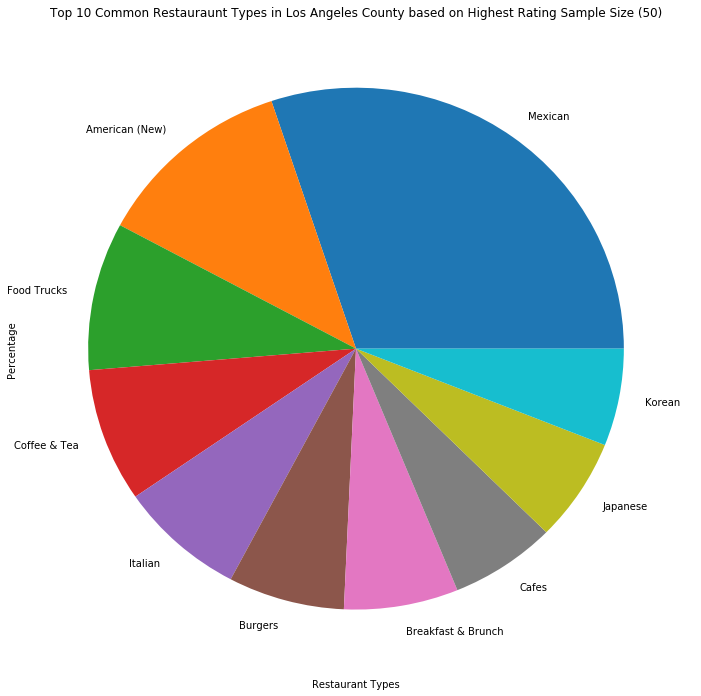

In [79]:
la_df=clean_census_file.groupby("category1")
la=la_df["County"].count()
la=la.sort_values(ascending=False)
la=la/la.sum()
la=pd.DataFrame(la)
la=la.iloc[0:10]
# div=div.loc[div["County"]>=0.02]
total=la["County"].sum()
la=la["County"]/total
la=pd.DataFrame(la)



chart_diverse=la["County"].plot(kind='pie',figsize=(12,12))

chart_diverse.set_xlabel("Restaurant Types")
chart_diverse.set_ylabel("Percentage") 
chart_diverse.set_title("Top 10 Common Restauraunt Types in Los Angeles County based on Highest Rating Sample Size (50)")
plt.show()